Task1_0618. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계 2개 작성)

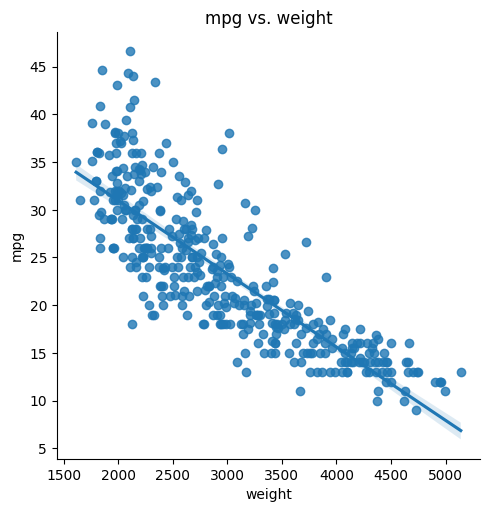

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_auto=pd.read_csv('/content/drive/MyDrive/KITA_2024/M3_분석라이브러리/dataset/auto-mpg.csv')

### lmplot data의 산점도와 회귀선 제공 (카테고리별로 plot 가능)
#sns.lmplot(x='weight', y='mpg', data=df_auto, hue='category')
sns.lmplot(x='weight', y='mpg', data=df_auto)
plt.title('mpg vs. weight')
plt.show()

<Figure size 1000x600 with 0 Axes>

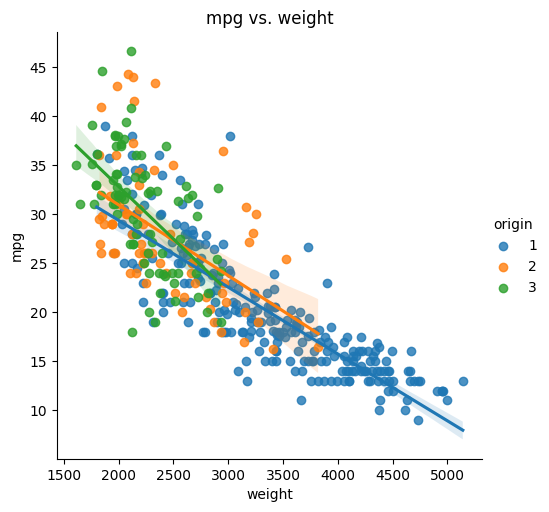

In [39]:
### lmplot data의 산점도와 회귀선 제공 (카테고리별로 plot 가능)
#sns.lmplot(x='weight', y='mpg', data=df_auto, hue='category')
plt.figure(figsize=(10,6))
sns.lmplot(x='weight', y='mpg', data=df_auto, hue='origin')
plt.title('mpg vs. weight')
plt.show()

<Figure size 1000x600 with 0 Axes>

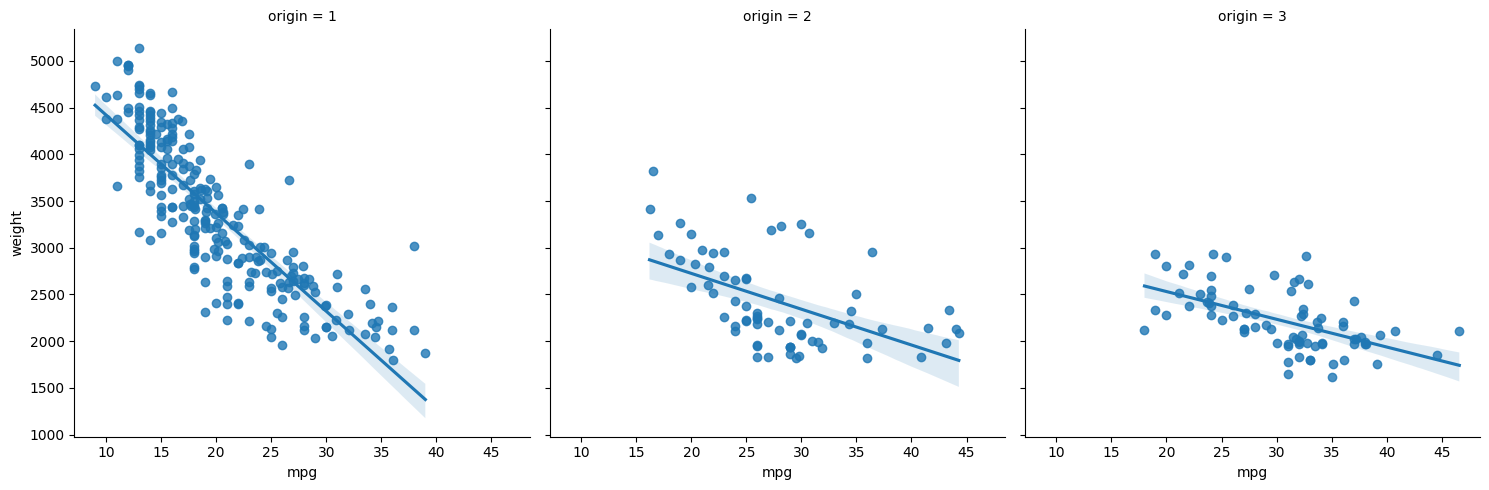

In [42]:
plt.figure(figsize=(10,6))
sns.lmplot(x='mpg', y='weight', data=df_auto, col='origin', col_wrap=3) # col_wrap=3은 한행에 최대 3개의 그래프를 표시하도록 설정
#plt.title('mpg vs. weight wrt. origin')
plt.show()

Task2_0618. pairplot을 생성해서 컬럼간의 관계를 시각화하세요. 단 종에 따라 다른 색상를 사용.

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


<Figure size 2000x800 with 0 Axes>

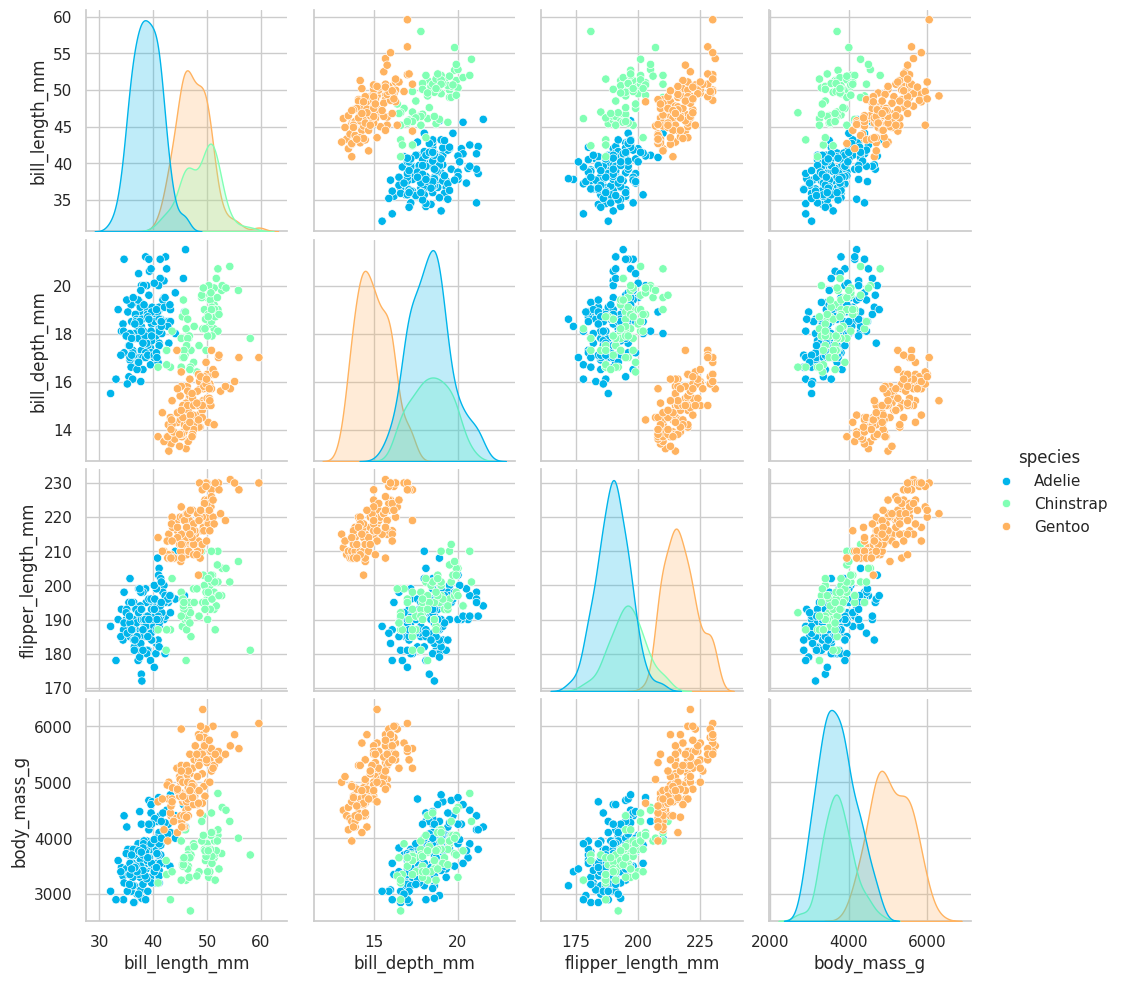

In [ ]:
df_pg=sns.load_dataset('penguins')
print(df_pg.head())
plt.figure(figsize=(20,8))
sns.pairplot(df_pg[['species','bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']], palette='rainbow', hue='species')
plt.show()

Task3_0618. 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.

In [ ]:
df_pg['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [ ]:
df_pg.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


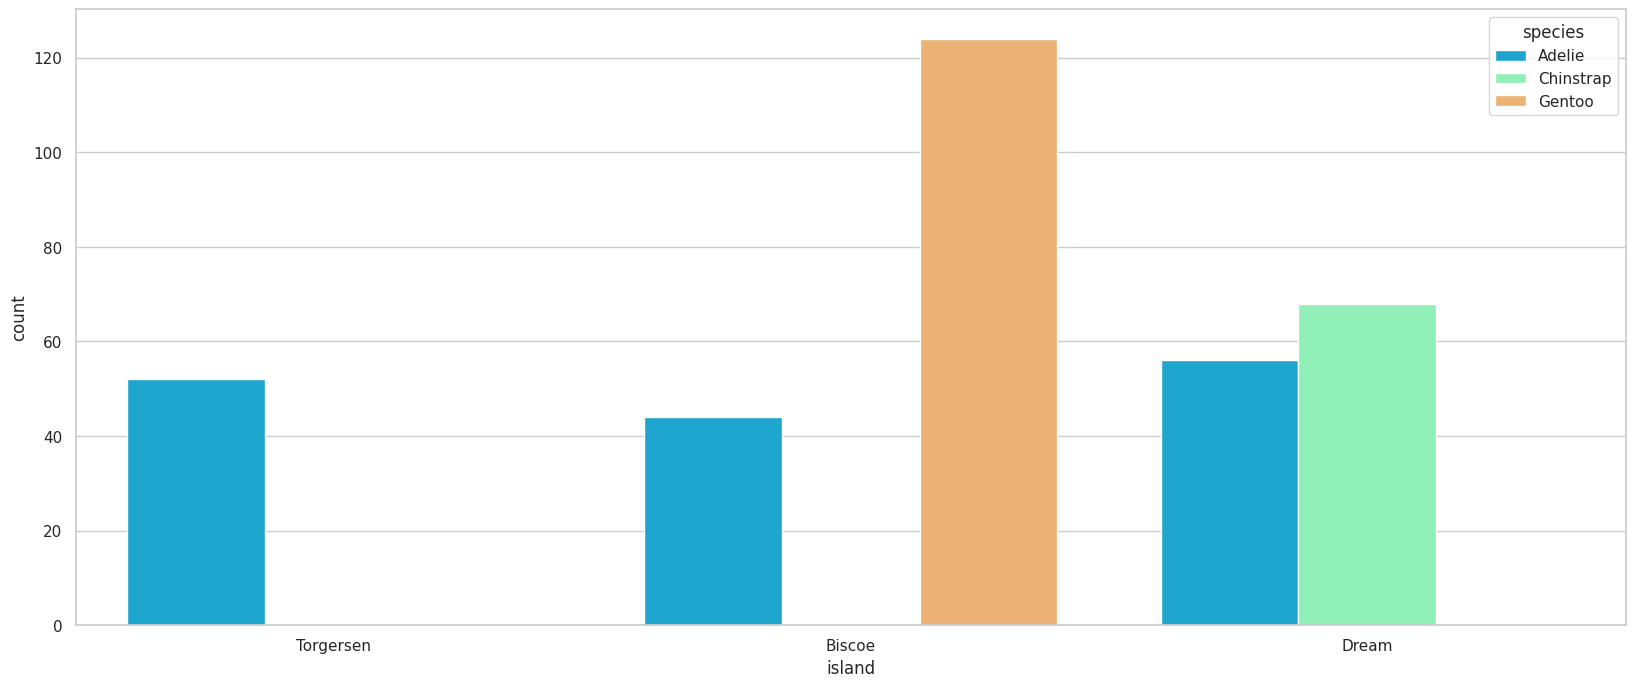

In [ ]:
df_pg=sns.load_dataset('penguins')
print(df_pg.head())
plt.figure(figsize=(20,8))
sns.countplot(x='island', palette='rainbow', hue='species', data=df_pg)
plt.show()

Task4_0618. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요.

In [ ]:
t_df=sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
t_df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

<ipython-input-47-aae55b6cdf2e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['gender'] = t_df['sex'].map({'female': 1, 'male': 0})


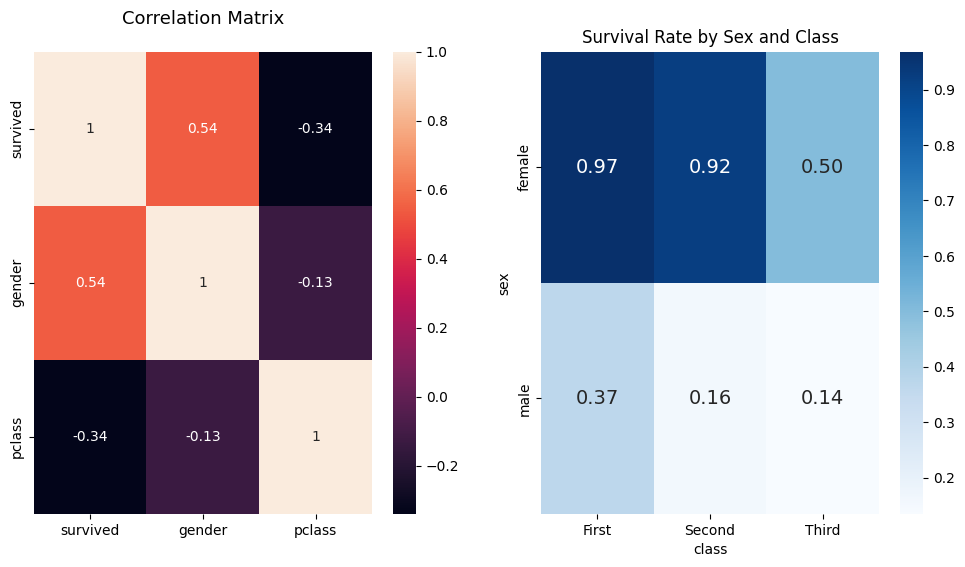

In [47]:
titanic=sns.load_dataset('titanic')
titanic.head()

t_df = titanic[['sex', 'class', 'survived','pclass']]
t_df['gender'] = t_df['sex'].map({'female': 1, 'male': 0})

# pivot_table을 사용하여 데이터 재구성: sex를 행 인덱스, class를 열 인덱스로 설정하고 생존율 계산
pivot_df = t_df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
#t_df['pclass'] = t_df['class'].map({'First': 1, 'Second':2 'Third': 3})
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.heatmap(t_df[['survived','gender','pclass']].corr(), annot=True)
plt.title("Correlation Matrix", pad=20, fontsize=13)
plt.subplot(1, 2, 2)
sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='.2f', annot_kws={"size": 14})
plt.title('Survival Rate by Sex and Class')
plt.show()

Task5_0618. 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.

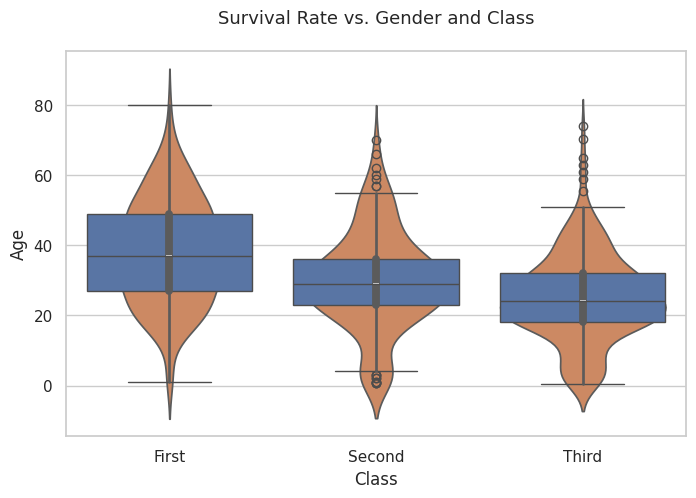

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=t_df, x='class', y='age')
sns.violinplot(data=t_df, x='class', y='age')
plt.xlabel('Class')
plt.ylabel('Age')
plt.title("Age vs. Class", pad=20, fontsize=13)
plt.show()

In [ ]:
from bs4 import BeautifulSoup

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a>
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>
</body></html>
"""

Task6_0618. 주어진 HTML 문서에서 모든 $<a>$ 태그를 추출하세요.

In [ ]:
## <a> 하이퍼링크를 정의. href 속성을 사용하여 링크 대상 URL을 지정

soup = BeautifulSoup(html_doc,'html.parser')
links=soup.find_all('a')
for link in links:
  print(link)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


Task7_0618. 주어진 HTML 문서에서 모든 $<p>$ 태그를 추출하세요

In [ ]:
## <p> 단락을 정의
soup = BeautifulSoup(html_doc,'html.parser')
parags=soup.find_all('p')
for parag in parags:
  print(parag)
  print(parag.get('class'))
  print(parag.text)

<p class="title"><b>The Dormouse's story</b></p>
['title']
The Dormouse's story


Task8_0618. 주어진 HTML 문서에서 모든 링크의 URL을 추출하세요

In [ ]:
## <a> 하이퍼링크를 정의. href 속성을 사용하여 링크 대상 URL을 지정
soup = BeautifulSoup(html_doc,'html.parser')
links=soup.find_all('a')
for link in links:
  print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


Task9_0618. 주어진 HTML 문서에서 클래스가 sister인 모든 태그를 추출하세요

In [ ]:
soup = BeautifulSoup(html_doc,'html.parser')
sister_tags = soup.find_all(class_='sister')

for sister in sister_tags:
  print('\n')
  print(sister)
  print(sister.get('id'))
  print(sister.get('href'))
  print(sister.text)



<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
link1
http://example.com/elsie
Elsie


<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
link2
http://example.com/lacie
Lacie


<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
link3
http://example.com/tillie
Tillie


Task10_0618. 주어진 HTML 문서에서 ID가 link1인 태그를 추출하세요

In [ ]:
soup = BeautifulSoup(html_doc,'html.parser')
ID_tags = soup.find_all(id='link1')

for ID in ID_tags:
  print('\n')
  print(ID)
  print(ID.get('id'))
  print(ID.get('href'))
  print(ID.text)



<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
link1
http://example.com/elsie
Elsie


Task11_0618. 주어진 HTML 문서에서 모든 텍스트를 추출하세요.

In [ ]:
soup = BeautifulSoup(html_doc,'html.parser')
# 모든 텍스트 추출
all_text = soup.get_text()
print(all_text)


The Dormouse's story

The Dormouse's story
Elsie
Lacie
Tillie




Task12_0618. 주어진 HTML 문서에서 href 속성이 http://example.com/lacie인 태그를 추출하세요.

In [ ]:
## <a> 하이퍼링크를 정의. href 속성을 사용하여 링크 대상 URL을 지정
soup = BeautifulSoup(html_doc,'html.parser')
links=soup.find_all('a')
for link in links:
  if link.get('href')=='http://example.com/lacie':
    print(link)
    print(link.get('href'))



<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
http://example.com/lacie


In [ ]:
from bs4 import BeautifulSoup

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a>
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>
</body></html>
"""

Task13_0618. 주어진 HTML 문서에서 ID가 link1인 태그의 부모 태그를 추출하세요.

In [ ]:
soup = BeautifulSoup(html_doc, 'html.parser')
tag_link1 = soup.find(id='link1')
print("ID가 link1인 태그: \n")
print(tag_link1)
parent_tag = tag_link1.parent
print("\n\n부모 태그: \n")
print(parent_tag,'\n')
print("부모 태그의 name: \n")
print(parent_tag.name)
print("부모 태그의 class: \n")
print(parent_tag.get('class'))
print("부모 태그의 ID: \n")
print(parent_tag.get('id'))
print("부모 태그의 text: \n")
print(parent_tag.text)

ID가 link1인 태그: 

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>


부모 태그: 

<body>
<p class="title"><b>The Dormouse's story</b></p>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
</body> 

부모 태그의 name: 

body
부모 태그의 class: 

None
부모 태그의 ID: 

None
부모 태그의 text: 


The Dormouse's story
Elsie
Lacie
Tillie



Task14_0618. 주어진 HTML 문서에서 ID가 link1인 태그의 다음 형제 태그를 추출하세요.

In [ ]:
soup = BeautifulSoup(html_doc, 'html.parser')
tag_link1 = soup.find(id='link1')
# 다음 형제 태그 추출
next_sibling_tag = tag_link1.find_next_sibling()
print("ID가 link1인 태그의 다음 형제 태그: \n")
print(next_sibling_tag)
print("다음 형제 태그의 name: \n")
print(next_sibling_tag.name)
print("다음 형제 태그의 class: \n")
print(next_sibling_tag.get('class'))
print("다음 형제 태그의 ID: \n")
print(next_sibling_tag.get('id'))
print("다음 형제 태그의 text: \n")
print(next_sibling_tag.text)


ID가 link1인 태그의 다음 형제 태그: 

<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
다음 형제 태그의 name: 

a
다음 형제 태그의 class: 

['sister']
다음 형제 태그의 ID: 

link2
다음 형제 태그의 text: 

Lacie


Task15_0618. 주어진 HTML 문서에서 ID가 link1인 태그의 href 속성 값을 추출하세요.

In [ ]:
soup = BeautifulSoup(html_doc, 'html.parser')
tag_link1 = soup.find(id='link1')
href_value = tag_link1.get('href')
print("ID가 link1인 태그의 href 속성 값: \n")
print(href_value)

ID가 link1인 태그의 href 속성 값: 

http://example.com/elsie
